In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo
from datetime import (
    datetime,
    timedelta,
)
from matplotlib.dates import date2num, DateFormatter

import pandas as pd

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

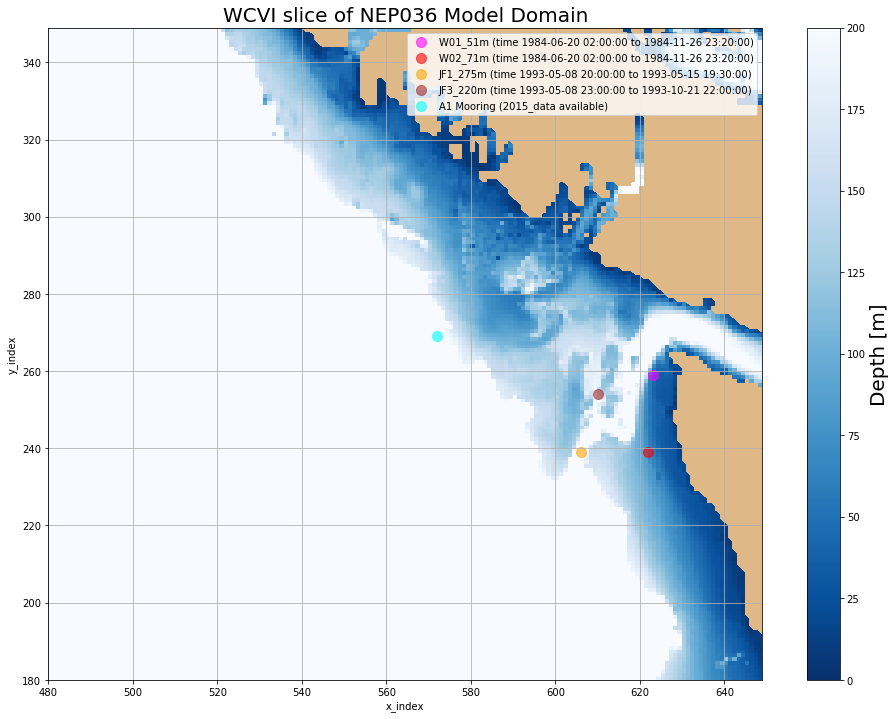

In [3]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)



lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]


cmap = plt.get_cmap('Blues_r')

cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=200)




lon_W01 = -124.82500
lat_W01 = 48.31500

j, i = geo_tools.find_closest_model_point(lon_W01,lat_W01,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})      
ax.scatter(i, j, c='magenta', s=100, alpha=0.6, label = 'W01_51m (time 1984-06-20 02:00:00 to 1984-11-26 23:20:00)')

lon_W02 = -124.89500
lat_W02 = 48.04167

y, x = geo_tools.find_closest_model_point(lon_W02,lat_W02,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
ax.scatter(x, y, c='red', s=100, alpha=0.6, label = 'W02_71m (time 1984-06-20 02:00:00 to 1984-11-26 23:20:00)')

lon_JF1 = -125.31383
lat_JF1 = 48.05433

y, x = geo_tools.find_closest_model_point(lon_JF1,lat_JF1,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
ax.scatter(x, y, c='orange', s=100, alpha=0.6, label = 'JF1_275m (time 1993-05-08 20:00:00 to 1993-05-15 19:30:00)')

lon_JF3 = -125.20267
lat_JF3 = 48.25867

y, x = geo_tools.find_closest_model_point(lon_JF3,lat_JF3,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
ax.scatter(x, y, c='brown', s=100, alpha=0.6, label = 'JF3_220m (time 1993-05-08 23:00:00 to 1993-10-21 22:00:00)')


lon_A1 = -126.20433
lat_A1 = 48.52958

j, i = geo_tools.find_closest_model_point(lon_A1,lat_A1,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 
ax.scatter(i, j, c='cyan', s=100, alpha=0.6, label = 'A1 Mooring (2015_data available)')

legend = ax.legend(loc='best', fancybox=True, framealpha=0.8)
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()


In [138]:
W02_data_30m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W02_19840619_19841126_0030m.csv',delim_whitespace=1,header = None, skiprows=117)

W02_data_30m.columns = ['Salinity', 'Temperature', 'Direction', 'Speed']

W02_data_30m.tail(10)

,Salinity,Temperature,Direction,Speed
11503,31.920,11.438,270.0,0.198
11504,31.863,11.414,264.0,0.191
11505,31.825,11.414,267.0,0.196
11506,31.845,11.414,273.0,0.207
11507,31.900,11.461,281.0,0.212
11508,31.939,11.461,290.0,0.209
11509,32.031,11.554,307.0,0.188
11510,31.742,11.601,331.0,0.186
11511,32.144,11.624,346.0,0.186
11512,32.144,11.624,357.0,0.172


In [140]:
W02_data_50m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W02_19840619_19841126_0050m.csv',delim_whitespace=1,header = None, skiprows=117)

W02_data_50m.columns = ['Salinity', 'Temperature', 'Direction', 'Speed']

W02_data_50m.tail(10)

,Salinity,Temperature,Direction,Speed
11503,32.385,11.646,326.0,0.131
11504,32.385,11.646,332.0,0.145
11505,32.361,11.622,331.0,0.146
11506,32.098,11.622,329.0,0.135
11507,32.164,11.622,327.0,0.125
11508,32.340,11.622,331.0,0.119
11509,32.385,11.646,338.0,0.114
11510,32.385,11.646,342.0,0.110
11511,32.384,11.622,341.0,0.104
11512,32.385,11.646,329.0,0.095


In [141]:
W02_data_65m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W02_19840619_19841126_0065m.csv',delim_whitespace=1,header = None, skiprows=117)

W02_data_65m.columns = ['Reference', 'Temperature', 'Direction', 'Speed']

W02_data_65m.tail(10)

,Reference,Temperature,Direction,Speed
11498,401.0,11.554,321.0,0.115
11499,401.0,11.600,323.0,0.104
11500,401.0,11.600,324.0,0.065
11501,401.0,11.600,325.0,0.019
11502,401.0,11.600,322.0,0.009
11503,401.0,11.600,323.0,0.019
11504,401.0,11.600,323.0,0.020
11505,401.0,11.577,323.0,0.020
11506,401.0,11.600,317.0,0.021
11507,401.0,11.507,302.0,0.036


In [142]:
Speed_30 = np.array(W02_data_30m['Speed'], dtype = np.float)[:]
Direct_30 = np.array(W02_data_30m['Direction'], dtype = np.float)[:]

vel_east_30 = np.empty_like(Speed_30)
vel_north_30 = np.empty_like(Speed_30)

vel_east_30[:] = Speed_30[:]*np.cos(np.radians(Direct_30[:]))
vel_north_30[:] = Speed_30[:]*np.sin(np.radians(Direct_30[:]))


Speed_50 = np.array(W02_data_50m['Speed'], dtype = np.float)[:]
Direct_50 = np.array(W02_data_50m['Direction'], dtype = np.float)[:]

vel_east_50 = np.empty_like(Speed_50)
vel_north_50 = np.empty_like(Speed_50)

vel_east_50[:] = Speed_50[:]*np.cos(np.radians(Direct_50[:]))
vel_north_50[:] = Speed_50[:]*np.sin(np.radians(Direct_50[:]))


Speed_65 = np.array(W02_data_65m['Speed'], dtype = np.float)[:]
Direct_65 = np.array(W02_data_65m['Direction'], dtype = np.float)[:]

vel_east_65 = np.empty_like(Speed_65)
vel_north_65 = np.empty_like(Speed_65)

vel_east_65[:] = Speed_65[:]*np.cos(np.radians(Direct_65[:]))
vel_north_65[:] = Speed_65[:]*np.sin(np.radians(Direct_65[:]))

In [144]:
date1 = '1984-06-20-02:00:00'
date2 = '1984-11-26-23:20:00'


mydates = np.array(pd.date_range(date1, date2, freq="20min"))

# mydates = np.ndarray.round(mydates[:], decimals=0)

In [145]:
mydates.shape

(11513,)

In [146]:
np.max(Speed_65)

0.68400000000000005

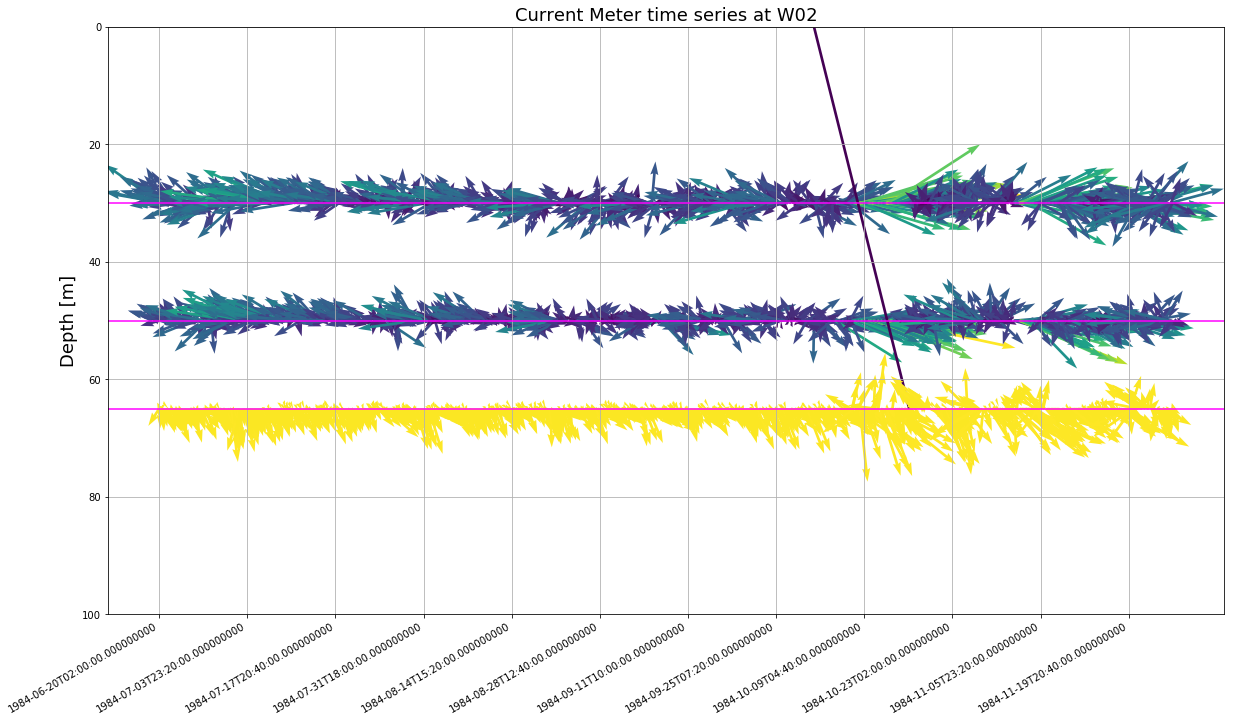

In [147]:
step = 10

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_65.shape[0], step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 50, vel_east_50[::step], vel_north_50[::step], Speed_50[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=50, color='magenta', label = '50 m')

ax.quiver(time_axis_quiver_65, 65, vel_east_65[::step], vel_north_65[::step], Speed_65[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale = 0.5)# , minshaft = 3)
ax.axhline(y=65, color='magenta', label = '65 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::100], my_dates[::100])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(0, 100)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W02', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

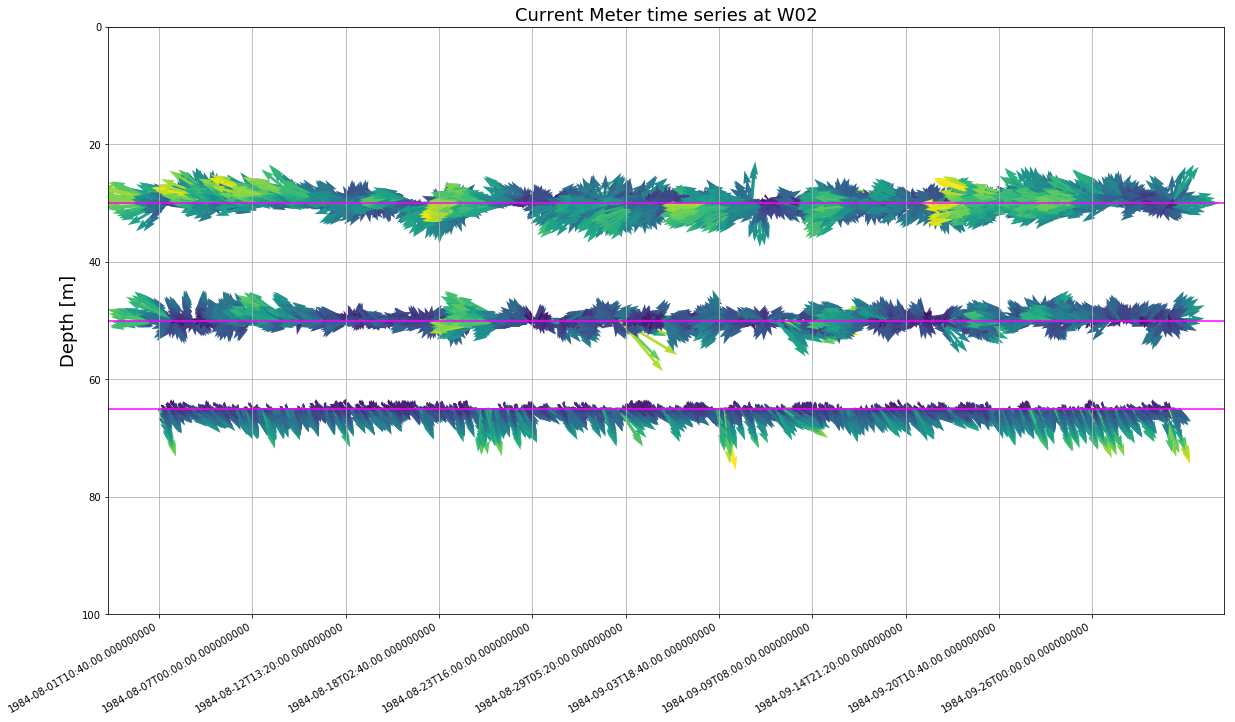

In [148]:
# mydates[3050:7400]

step = 1

time_axis_quiver = np.arange(0,vel_east_30[3050:7400].shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_65[3050:7400].shape[0], step)

my_dates = mydates[3050:7400:step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[3050:7400:step], vel_north_30[3050:7400:step], Speed_30[3050:7400:step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 50, vel_east_50[3050:7400:step], vel_north_50[3050:7400:step], Speed_50[3050:7400:step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=50, color='magenta', label = '50 m')

ax.quiver(time_axis_quiver_65, 65, vel_east_65[3050:7400:step], vel_north_65[3050:7400:step], Speed_65[3050:7400:step], angles='uv', scale_units='inches', minshaft= 0.01, scale = 0.5)# , minshaft = 3)
ax.axhline(y=65, color='magenta', label = '65 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::400], my_dates[::400])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(0, 100)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W02', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [149]:
W01_data_30m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W01_19840619_19841102_0030m.csv',delim_whitespace=1,header = None, skiprows=116)

W01_data_30m.columns = ['Reference', 'Temperature', 'Direction', 'Speed']

W01_data_30m.tail(10)

,Reference,Temperature,Direction,Speed
9757,273.0,11.042,-99.0,0.567
9758,273.0,11.019,-99.0,0.673
9759,273.0,11.065,-99.0,0.791
9760,273.0,11.065,-99.0,0.841
9761,273.0,11.042,-99.0,0.858
9762,273.0,10.996,-99.0,0.863
9763,273.0,10.972,-99.0,0.861
9764,273.0,10.949,-99.0,0.883
9765,273.0,10.926,-99.0,0.872
9766,273.0,10.949,-99.0,0.891


In [150]:
W01_data_45m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W01_19840619_19841102_0045m.csv',delim_whitespace=1,header = None, skiprows=116)

W01_data_45m.columns = ['Reference', 'Temperature', 'Direction', 'Speed']

W01_data_45m.tail(10)

,Reference,Temperature,Direction,Speed
9757,550.0,10.684,5.0,0.631
9758,551.0,10.893,6.0,0.711
9759,550.0,10.823,6.0,0.739
9760,550.0,10.846,7.0,0.779
9761,551.0,10.823,6.0,0.820
9762,550.0,10.869,10.0,0.826
9763,551.0,10.869,14.0,0.800
9764,550.0,10.846,13.0,0.767
9765,551.0,10.869,9.0,0.728
9766,551.0,10.869,7.0,0.716


In [151]:
Speed_30 = np.array(W01_data_30m['Speed'], dtype = np.float)[:]
Direct_30 = np.array(W01_data_30m['Direction'], dtype = np.float)[:]

vel_east_30 = np.empty_like(Speed_30)
vel_north_30 = np.empty_like(Speed_30)

vel_east_30[:] = Speed_30[:]*np.cos(np.radians(Direct_30[:]))
vel_north_30[:] = Speed_30[:]*np.sin(np.radians(Direct_30[:]))


Speed_45 = np.array(W01_data_45m['Speed'], dtype = np.float)[:]
Direct_45 = np.array(W01_data_45m['Direction'], dtype = np.float)[:]

vel_east_45 = np.empty_like(Speed_45)
vel_north_45 = np.empty_like(Speed_45)

vel_east_45[:] = Speed_45[:]*np.cos(np.radians(Direct_45[:]))
vel_north_45[:] = Speed_45[:]*np.sin(np.radians(Direct_45[:]))




In [154]:
date1 = '1984-06-20-02:00:00'
date2 = '1984-11-26-23:20:00'


mydates = np.array(pd.date_range(date1, date2, freq="20min"))

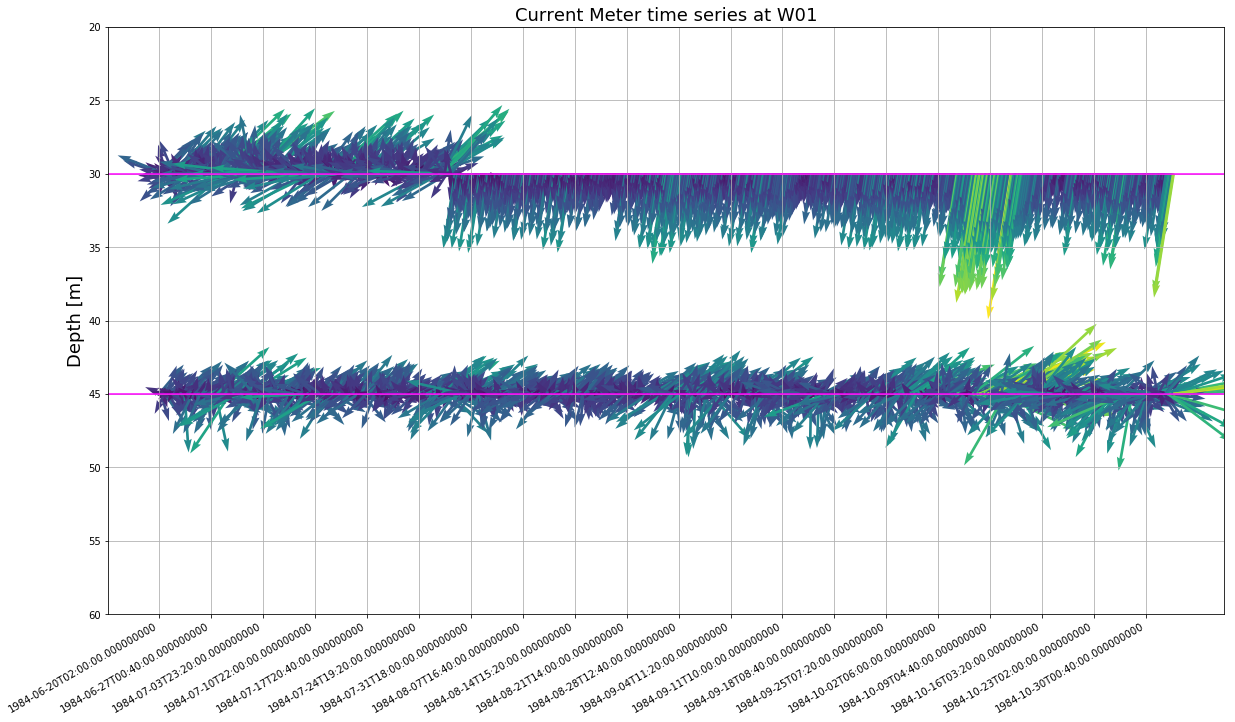

In [167]:
step = 5

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_65.shape[0], step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 45, vel_east_45[::step], vel_north_45[::step], Speed_45[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=45, color='magenta', label = '45 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::100], my_dates[::100])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(20, 60)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W01', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

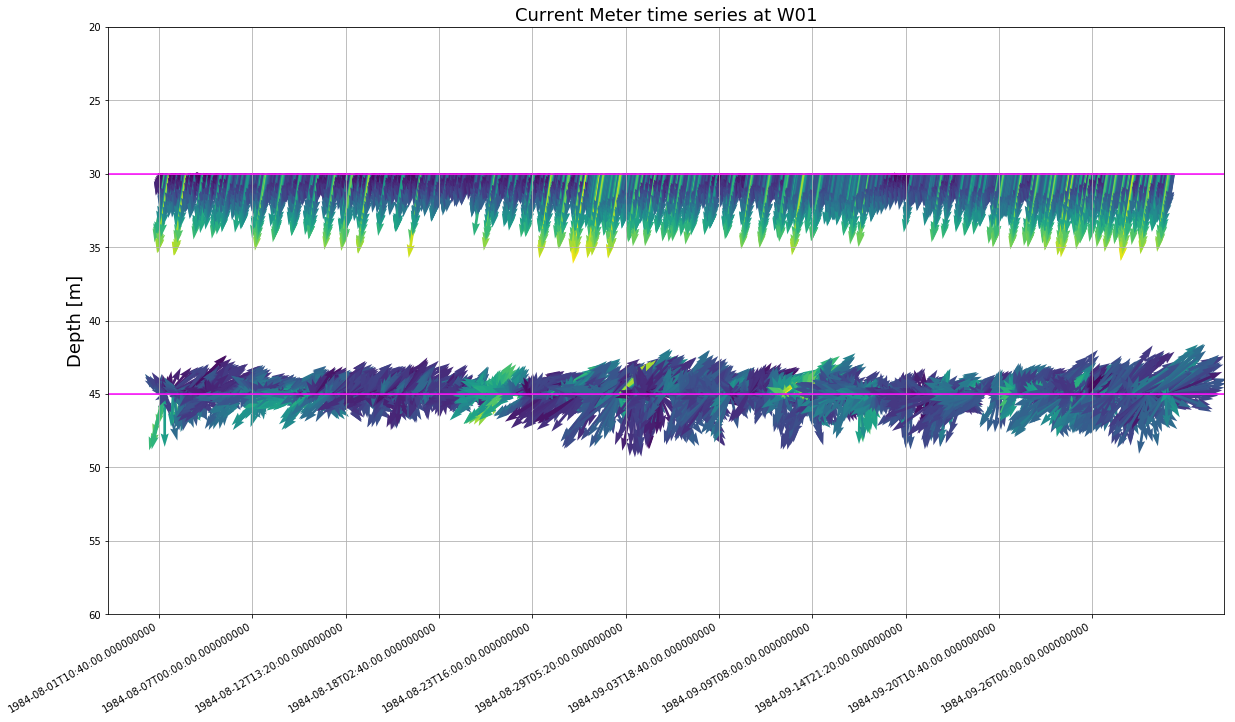

In [169]:
# mydates[3050:7400]

step = 1

time_axis_quiver = np.arange(0,vel_east_30[3050:7400].shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_65[3050:7400].shape[0], step)

my_dates = mydates[3050:7400:step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[3050:7400:step], vel_north_30[3050:7400:step], Speed_30[3050:7400:step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 45, vel_east_45[3050:7400:step], vel_north_45[3050:7400:step], Speed_50[3050:7400:step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=45, color='magenta', label = '50 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::400], my_dates[::400])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(20, 60)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W01', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

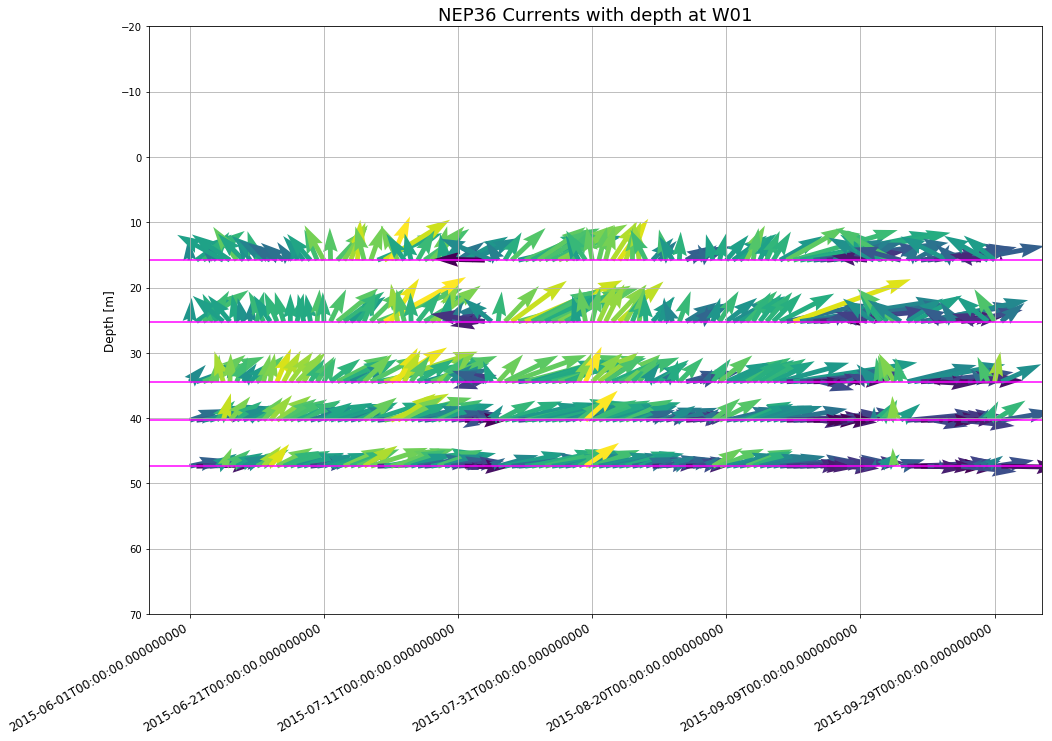

In [8]:
from IPython.display import Image


Image("/home/ssahu/saurav/3D_images_for_video_spice/W01_Model.png")

In [173]:
JF3_data_30m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF3_19930508_19931021_0030m.csv',delim_whitespace=1,header = None, skiprows=95)

JF3_data_30m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF3_data_30m.tail(10)

,Salinity,Temperature,Pressure,Direction,Speed
7957,30.231,9.529,20.524,165.037,0.124
7958,30.202,9.460,20.375,177.871,0.074
7959,30.704,10.401,20.375,207.443,0.038
7960,30.756,9.781,20.375,229.293,0.041
7961,30.776,9.758,20.375,244.957,0.055
7962,30.922,9.942,20.375,267.037,0.075
7963,29.673,9.415,20.598,292.374,0.080
7964,30.005,9.643,20.822,333.224,0.057
7965,30.824,9.346,20.971,20.258,0.038
7966,30.627,9.575,21.120,22.840,0.033


In [175]:
JF3_data_75m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF3_19930508_19931021_0075m.csv',delim_whitespace=1,header = None, skiprows=96)

JF3_data_75m.columns = ['Salinity', 'Temperature', 'Direction', 'Speed']

JF3_data_75m.tail(10)

,Salinity,Temperature,Direction,Speed
7957,33.602,7.991,68.149,0.121
7958,33.363,8.242,66.000,0.114
7959,33.573,8.022,71.328,0.112
7960,33.542,8.054,87.514,0.098
7961,33.587,8.007,127.500,0.082
7962,33.602,7.991,176.700,0.082
7963,33.602,7.991,206.538,0.086
7964,33.602,7.991,224.826,0.088
7965,33.602,7.991,247.725,0.102
7966,33.602,7.991,268.189,0.116


In [180]:
JF3_data_200m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF3_19930508_19931021_0200m.csv',delim_whitespace=1,header = None, skiprows=93)

JF3_data_200m.columns = ['Salinity', 'Temperature', 'Temperature (High res)','Direction', 'Speed']

JF3_data_200m.tail(10)

,Salinity,Temperature,Temperature (High res),Direction,Speed
7957,33.730,6.911,6.935,-99999.0,-99999.0
7958,33.777,6.911,6.935,-99999.0,-99999.0
7959,33.754,6.934,6.959,-99999.0,-99999.0
7960,33.747,6.956,6.966,-99999.0,-99999.0
7961,33.747,6.956,6.966,-99999.0,-99999.0
7962,33.747,6.956,6.966,-99999.0,-99999.0
7963,33.754,6.934,6.959,-99999.0,-99999.0
7964,33.761,6.934,6.951,-99999.0,-99999.0
7965,33.754,6.934,6.959,-99999.0,-99999.0
7966,33.769,6.934,6.943,-99999.0,-99999.0


In [181]:
Speed_30 = np.array(JF3_data_30m['Speed'], dtype = np.float)[:]
Direct_30 = np.array(JF3_data_30m['Direction'], dtype = np.float)[:]

vel_east_30 = np.empty_like(Speed_30)
vel_north_30 = np.empty_like(Speed_30)

vel_east_30[:] = Speed_30[:]*np.cos(np.radians(Direct_30[:]))
vel_north_30[:] = Speed_30[:]*np.sin(np.radians(Direct_30[:]))


Speed_75 = np.array(JF3_data_75m['Speed'], dtype = np.float)[:]
Direct_75 = np.array(JF3_data_75m['Direction'], dtype = np.float)[:]

vel_east_75 = np.empty_like(Speed_75)
vel_north_75 = np.empty_like(Speed_75)

vel_east_75[:] = Speed_75[:]*np.cos(np.radians(Direct_75[:]))
vel_north_75[:] = Speed_75[:]*np.sin(np.radians(Direct_75[:]))


Speed_200 = np.array(JF3_data_200m['Speed'], dtype = np.float)[:]
Direct_200 = np.array(JF3_data_200m['Direction'], dtype = np.float)[:]

vel_east_200 = np.empty_like(Speed_200)
vel_north_200 = np.empty_like(Speed_200)

vel_east_200[:] = Speed_200[:]*np.sin(np.radians(Direct_200[:]))

In [182]:
date1 = '1993-05-08-23:00:00'
date2 = '1993-10-21-22:00:00'


mydates = np.array(pd.date_range(date1, date2, freq="30min"))

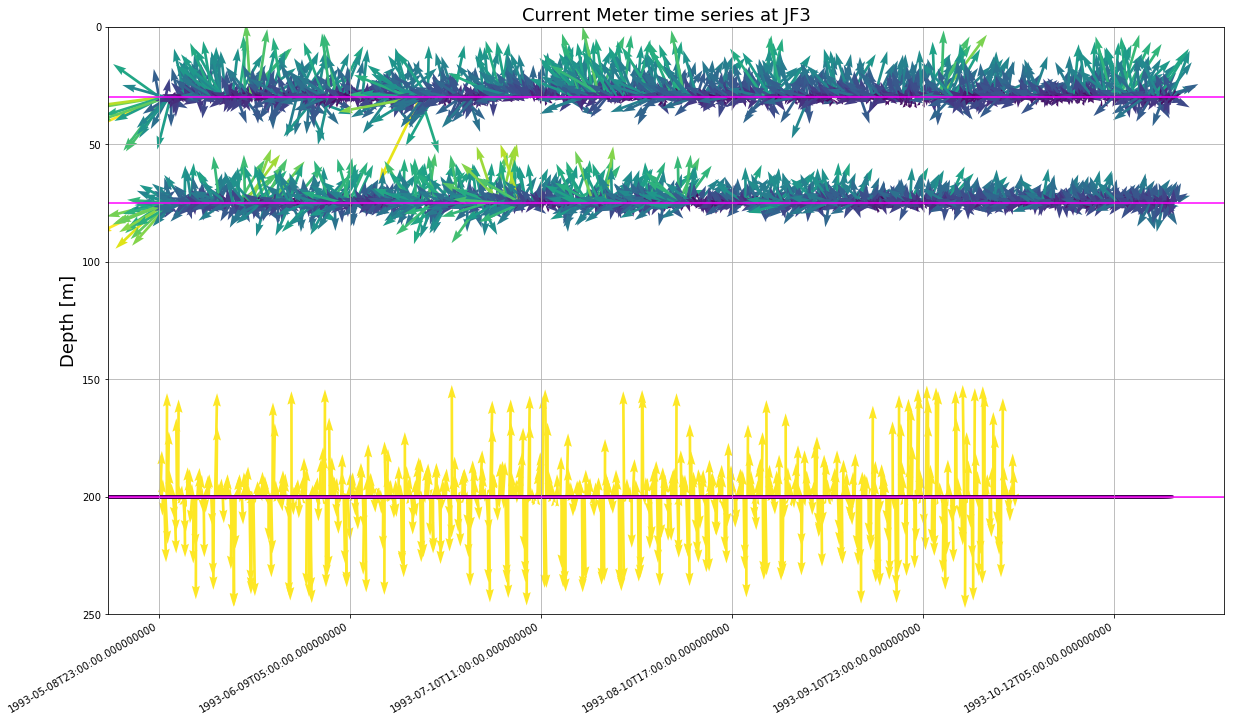

In [202]:
step = 5

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 75, vel_east_75[::step], vel_north_75[::step], Speed_75[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=75, color='magenta', label = '45 m')

ax.quiver(time_axis_quiver, 200, vel_east_200[::step], vel_north_200[::step], Speed_200[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=2)# , minshaft = 3)
ax.axhline(y=200, color='magenta', label = '200 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::300], my_dates[::300])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(0, 250)
ax.invert_yaxis()
ax.set_title('Current Meter time series at JF3', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [204]:
JF1_data_30m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF1_19930508_19930515_0030m.csv',delim_whitespace=1,header = None, skiprows=92)

JF1_data_30m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF1_data_30m.tail(10)

,Salinity,Temperature,Pressure,Direction,Speed
326,32.215,10.092,31.859,258.741,0.094
327,32.128,10.092,31.859,261.092,0.092
328,32.147,9.679,31.859,254.140,0.076
329,32.343,9.656,32.005,243.247,0.065
330,31.979,9.770,32.005,236.155,0.058
331,32.195,9.724,32.005,251.842,0.053
332,31.646,9.404,31.712,279.000,0.056
333,31.646,9.404,31.712,274.133,0.059
334,31.755,9.381,31.420,257.687,0.070
335,31.711,9.381,31.566,255.026,0.078


In [207]:
JF1_data_75m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF1_19930508_19930515_0075m.csv',delim_whitespace=1,header = None, skiprows=92)

JF1_data_75m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF1_data_75m.tail(10)

,Salinity,Temperature,Pressure,Direction,Speed
326,33.235,9.239,75.915,273.806,0.171
327,33.256,9.216,75.915,282.510,0.181
328,33.256,9.216,75.915,291.633,0.186
329,33.193,9.331,75.915,298.941,0.185
330,33.193,9.331,75.915,308.190,0.184
331,33.172,9.354,75.915,324.649,0.190
332,33.034,9.216,75.915,335.958,0.192
333,33.099,9.194,75.915,339.899,0.179
334,33.013,9.239,75.915,336.317,0.161
335,32.970,9.285,75.915,326.389,0.158


In [210]:
JF1_data_150m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF1_19930508_19930515_0150m.csv',delim_whitespace=1,header = None, skiprows=94)

JF1_data_150m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF1_data_150m.tail(10)

,Salinity,Temperature,Pressure,Direction,Speed
326,35.388,7.101,7.093,30.623,0.242
327,35.388,7.055,7.047,35.004,0.252
328,35.397,6.988,6.992,39.479,0.251
329,35.445,6.943,6.946,46.472,0.248
330,35.381,7.010,7.008,49.518,0.237
331,35.372,7.123,7.109,49.964,0.221
332,35.274,7.394,7.389,54.483,0.212
333,35.241,7.485,7.467,61.163,0.192
334,35.208,7.598,7.592,66.825,0.160
335,35.201,7.598,7.599,59.990,0.112


In [212]:
JF1_data_250m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF1_19930508_19930515_0250m.csv',delim_whitespace=1,header = None, skiprows=92)

JF1_data_250m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF1_data_250m.tail(10)

,Salinity,Temperature,Pressure,Direction,Speed
326,34.271,6.201,6.222,60.471,0.113
327,34.293,6.133,6.152,59.106,0.108
328,34.317,6.111,6.128,44.609,0.061
329,34.307,6.021,6.043,330.631,0.037
330,34.315,6.066,6.082,294.801,0.065
331,34.317,6.111,6.128,286.295,0.095
332,34.295,6.179,6.198,284.422,0.128
333,34.281,6.292,6.307,287.015,0.130
334,34.244,6.427,6.439,302.040,0.092
335,34.269,6.472,6.509,334.500,0.075


In [213]:
Speed_30 = np.array(JF1_data_30m['Speed'], dtype = np.float)[:]
Direct_30 = np.array(JF1_data_30m['Direction'], dtype = np.float)[:]

vel_east_30 = np.empty_like(Speed_30)
vel_north_30 = np.empty_like(Speed_30)

vel_east_30[:] = Speed_30[:]*np.cos(np.radians(Direct_30[:]))
vel_north_30[:] = Speed_30[:]*np.sin(np.radians(Direct_30[:]))


Speed_75 = np.array(JF1_data_75m['Speed'], dtype = np.float)[:]
Direct_75 = np.array(JF1_data_75m['Direction'], dtype = np.float)[:]

vel_east_75 = np.empty_like(Speed_75)
vel_north_75 = np.empty_like(Speed_75)

vel_east_75[:] = Speed_75[:]*np.cos(np.radians(Direct_75[:]))
vel_north_75[:] = Speed_75[:]*np.sin(np.radians(Direct_75[:]))


Speed_150 = np.array(JF1_data_150m['Speed'], dtype = np.float)[:]
Direct_150 = np.array(JF1_data_150m['Direction'], dtype = np.float)[:]

vel_east_150 = np.empty_like(Speed_150)
vel_north_150 = np.empty_like(Speed_150)

vel_east_150[:] = Speed_150[:]*np.sin(np.radians(Direct_150[:]))


Speed_250 = np.array(JF1_data_250m['Speed'], dtype = np.float)[:]
Direct_250 = np.array(JF1_data_250m['Direction'], dtype = np.float)[:]

vel_east_250 = np.empty_like(Speed_250)
vel_north_250 = np.empty_like(Speed_250)

vel_east_250[:] = Speed_250[:]*np.sin(np.radians(Direct_250[:]))

In [216]:
date1 = '1993-05-08-20:00:00'
date2 = '1993-05-15-19:30:00'


mydates = np.array(pd.date_range(date1, date2, freq="30min"))




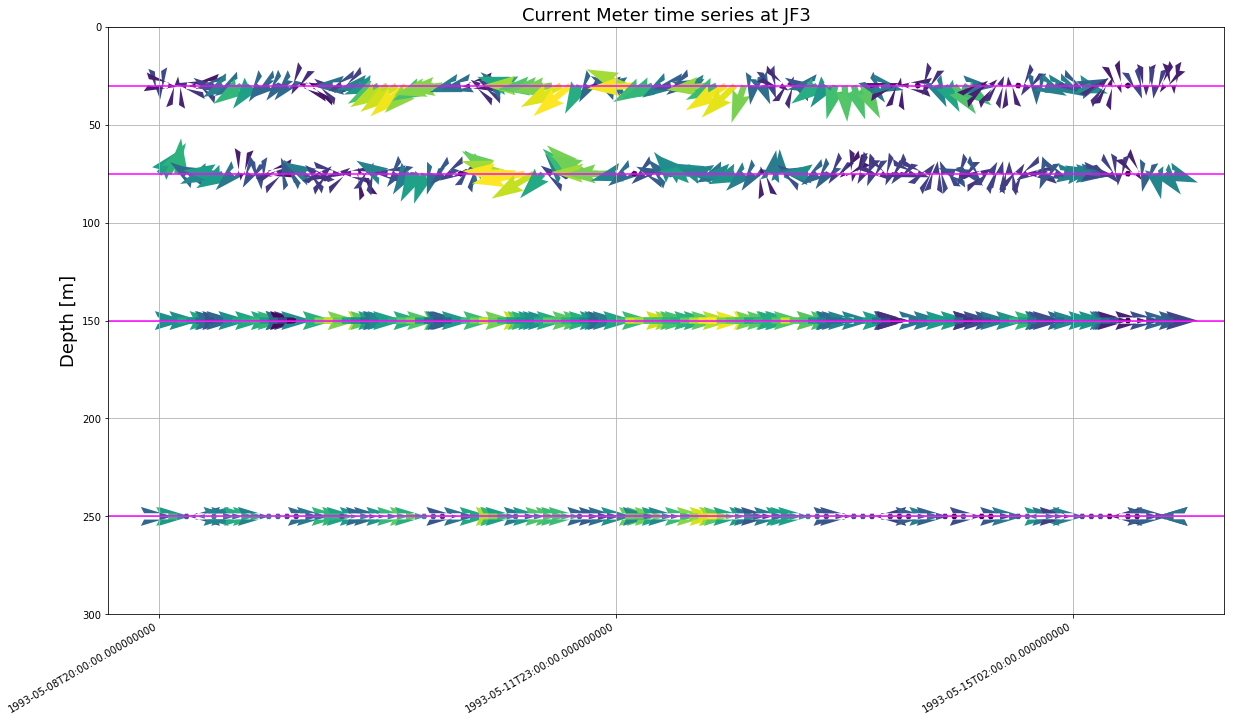

In [220]:
step = 3

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 75, vel_east_75[::step], vel_north_75[::step], Speed_75[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=75, color='magenta', label = '45 m')

ax.quiver(time_axis_quiver, 150, vel_east_150[::step], vel_north_150[::step], Speed_150[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=150, color='magenta', label = '200 m')

ax.quiver(time_axis_quiver, 250, vel_east_250[::step], vel_north_250[::step], Speed_250[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=250, color='magenta', label = '200 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::50], my_dates[::50])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(0, 300)
ax.invert_yaxis()
ax.set_title('Current Meter time series at JF3', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

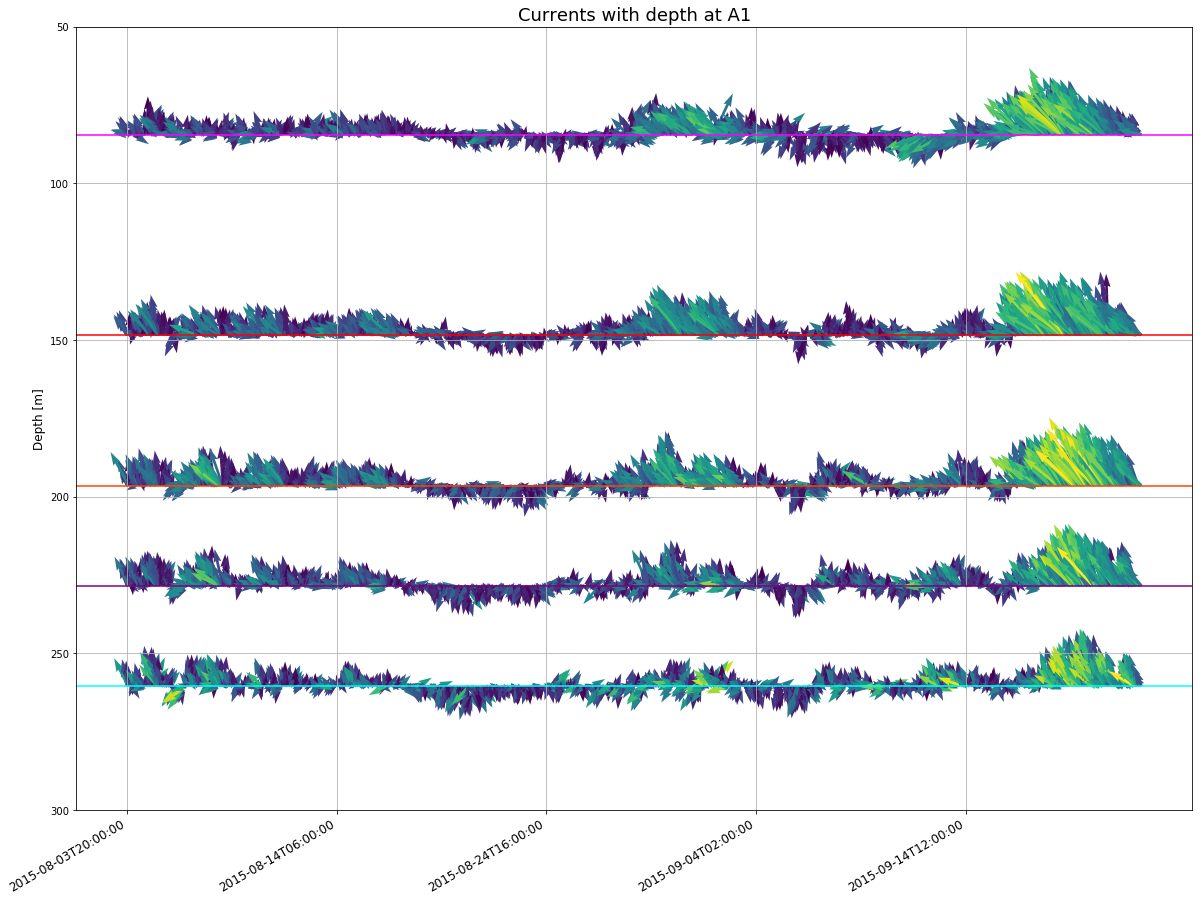

In [6]:
from IPython.display import Image


Image("/home/ssahu/saurav/3D_images_for_video_spice/A1_ADCP.png")

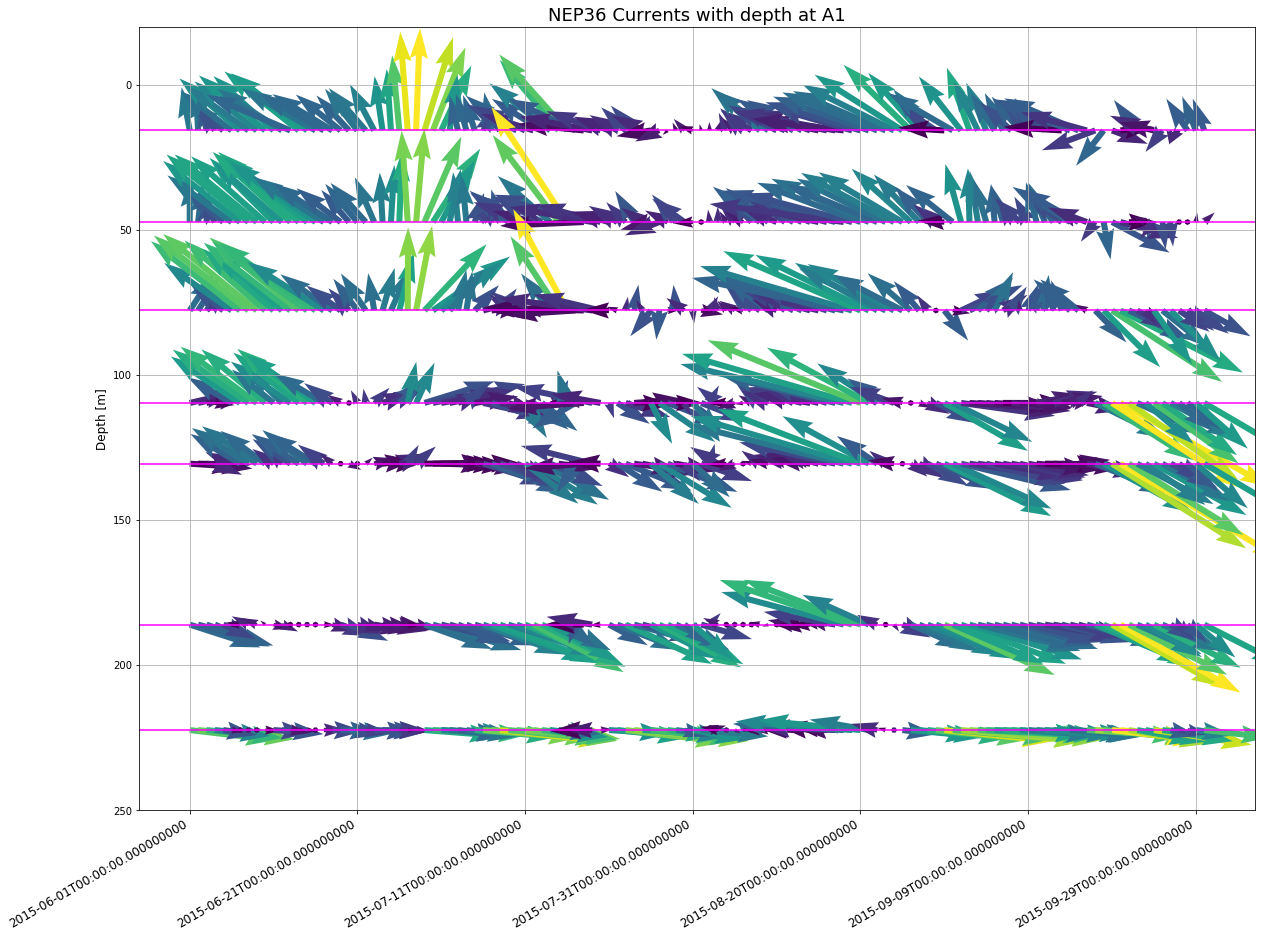

In [7]:
from IPython.display import Image


Image("/home/ssahu/saurav/3D_images_for_video_spice/A1_Model_currents.png")

In [ ]:
vel_east_84  = np.array(A1_data['vel_east_84.44'], dtype = np.float)[:4320]
mag_84       = np.sqrt(vel_east_84**2,vel_north_84**2)

vel_north_148 = np.array(A1_data['vel_north_148.44'], dtype = np.float)[:4320]
vel_east_148  = np.array(A1_data['vel_east_148.44'], dtype = np.float)[:4320]
mag_148       = np.sqrt(vel_east_148**2,vel_north_148**2)

vel_north_196 = np.array(A1_data['vel_north_196.44'], dtype = np.float)[:4320]
vel_east_196  = np.array(A1_data['vel_east_196.44'], dtype = np.float)[:4320]
mag_196      = np.sqrt(vel_east_196**2,vel_north_196**2)

In [ ]:
str_stuff = np.array(['Record_Number', 'Date', 'Time', 'Pitch', 'Roll', 'Heading', 'Pressure', 'Temperature'], dtype = 'str')

bin_depths = np.array([84.44, 100.44, 116.44, 132.44, 148.44, 164.44, 180.44, 196.44, 212.44, 228.44, 244.44, 260.44, 276.44\
              , 292.44, 308.44, 324.44, 340.44, 356.44, 372.44, 388.44, 404.44, 420.44, 436.44, 452.44, 468.44], dtype = 'str')

variables = np.array(['vel_north', 'vel_east', 'vel_vert', 'back_scatter_mean'], dtype = 'str')

column_data = []

for j in bin_depths:
    for i in variables:
        column_data = np.append(arr=column_data, values=i+'_'+j)
    

columns_A1 = np.concatenate((str_stuff, column_data), axis = 0)

A1_data.columns = columns_A1